In [1]:
"""
tournaments.ipynb

Jupyter Notebook to perform analysis on card market data.

Author: Casey Forey
Date Created: 4/7/24
"""

'\ntournaments.ipynb\n\nJupyter Notebook to perform analysis on card market data.\n\nAuthor: Casey Forey\nDate Created: 4/7/24\n'

In [2]:
# Imports
import json 
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import src.constants as c
import src.load.load_tournament_data as ltd
import src.plot.plot_set_data as psd
import src.plot.plot_tournament_data as ptd

In [3]:
path = 'data/AtomicCards.json' 
f = open(path, encoding= "utf8") 
atm_cards = json.load(f)

path = 'data/AllPrintings.json' 
f = open(path, encoding= "utf8") 
all_cards = json.load(f)

path = 'data/AllPricesToday.json' 
f = open(path) 
prices = json.load(f)

path = 'data/SetList.json' 
f = open(path, encoding= "utf8") 
set_list = json.load(f)

## Modern Data

In [4]:
base_path: str = os.path.join(c.DATA_DIRECTORY, '2023')
modern_card_counts_df: pd.DataFrame = ltd.load_format_card_counts(base_path, 'modern')
modern_card_counts_df

,card_name,total_count
0,Steam Vents,7516
1,Misty Rainforest,9509
2,Lightning Bolt,13268
3,Spell Snare,853
4,Polluted Delta,5732
...,...,...
1733,Royal Treatment,4
1734,Unravel the Aether,1
1735,Callous Sell-Sword,3
1736,Bloodthorn Flail,2


In [5]:
data = atm_cards['data']
cards_set = {}
i = 0
for card in data:
    card_info = data[card][0]
    if 'firstPrinting' in card_info:
        cards_set[card] = card_info['firstPrinting']
    else:
        i +=1
print(i)

42


In [6]:
cards_set_df = pd.DataFrame.from_dict(cards_set, orient='index')
cards_set_df.reset_index(inplace= True) 
cards_set_df.rename(columns={'index': 'card_name', 0:'set_name'},inplace= True) 
cards_set_df

,card_name,set_name
0,"""Ach! Hans, Run!""",UNH
1,"""Brims"" Barone, Midway Mobster",UNF
2,"""Lifetime"" Pass Holder",UNF
3,"""Name Sticker"" Goblin",UNF
4,"""Rumors of My Death . . .""",UST
...,...,...
28629,"Éomer, King of Rohan",LTC
28630,"Éomer, Marshal of Rohan",LTR
28631,"Éowyn, Fearless Knight",LTR
28632,"Éowyn, Lady of Rohan",LTR


In [7]:
def add_back_face(df):
    for card in df['card_name']:
        for name in cards_set_df['card_name']:
            front_name = name.split('//')[0].strip()
            if card == front_name and '//' in name:
                df['card_name'].replace(card, name,inplace = True)
    return df

In [8]:
modern_card_counts_df = add_back_face(modern_card_counts_df)

,card_name,total_count
0,Steam Vents,7516
1,Misty Rainforest,9509
2,Lightning Bolt,13268
3,Spell Snare,853
4,Polluted Delta,5732
...,...,...
1733,Royal Treatment,4
1734,Unravel the Aether,1
1735,Callous Sell-Sword // Burn Together,3
1736,Bloodthorn Flail,2


In [9]:
# Checking to see if double face cards look correct
for name in modern_card_counts_df['card_name']:
    if "Smelt" in name:
        print(name)

Brazen Borrower // Petty Theft


In [ ]:
modern_card_counts_df[modern_card_counts_df['card_name'] == 'Smelt // Herd // Saw']

In [10]:
modern_card_counts_df = modern_card_counts_df.merge(cards_set_df, on = 'card_name', how = 'left')
modern_card_counts_df

,card_name,total_count,set_name
0,Steam Vents,7516,GPT
1,Misty Rainforest,9509,ZEN
2,Lightning Bolt,13268,LEA
3,Spell Snare,853,DIS
4,Polluted Delta,5732,ONS
...,...,...,...
1733,Royal Treatment,4,WOE
1734,Unravel the Aether,1,BNG
1735,Callous Sell-Sword // Burn Together,3,WOE
1736,Bloodthorn Flail,2,LCI


In [11]:
set_year = {}
for set_id in set_list['data']:
    set_year[set_id['code']] = set_id['releaseDate'][0:4]
set_year_df = pd.DataFrame.from_dict(set_year, orient='index')
set_year_df.reset_index(inplace= True) 
set_year_df.rename(columns={'index': 'set_name', 0:'set_year'},inplace= True) 
set_year_df

,set_name,set_year
0,P15A,2008
1,PHTR,2017
2,G17,2017
3,PH17,2018
4,PH18,2019
...,...,...
741,ZNC,2020
742,ZNE,2020
743,MZNR,2020
744,PZNR,2020


In [12]:
modern_card_counts_df = modern_card_counts_df.merge(set_year_df, on='set_name', how='left', copy=True)
modern_card_counts_df

,card_name,total_count,set_name,set_year
0,Steam Vents,7516,GPT,2006
1,Misty Rainforest,9509,ZEN,2009
2,Lightning Bolt,13268,LEA,1993
3,Spell Snare,853,DIS,2006
4,Polluted Delta,5732,ONS,2002
...,...,...,...,...
1733,Royal Treatment,4,WOE,2023
1734,Unravel the Aether,1,BNG,2014
1735,Callous Sell-Sword // Burn Together,3,WOE,2023
1736,Bloodthorn Flail,2,LCI,2023


<Figure size 1200x800 with 0 Axes>

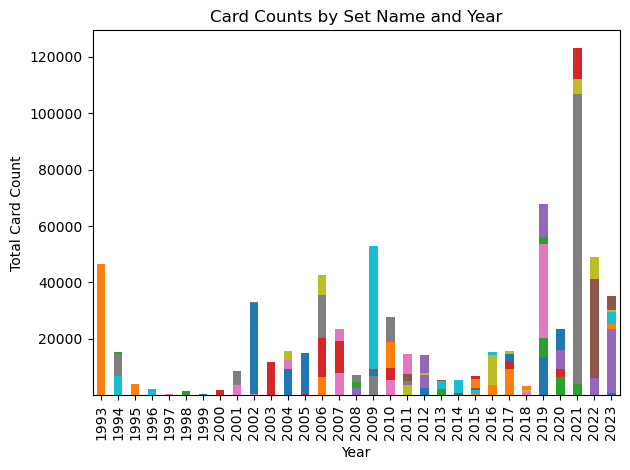

In [13]:
psd.plot_stacked_set_counts(modern_card_counts_df, set_year_df, 'modern')

<Axes: xlabel='set_year'>

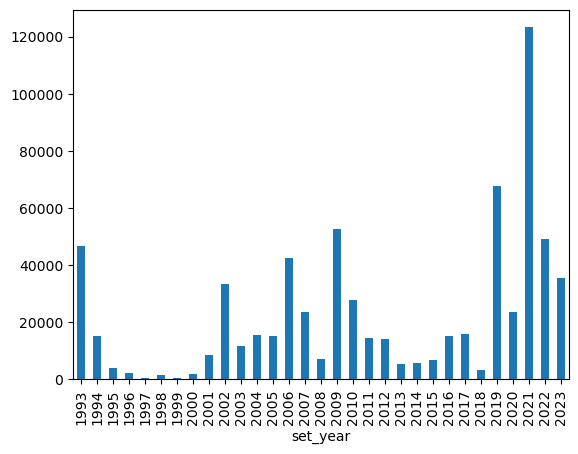

In [14]:
# Very limited Graph as a proof of concept
modern_card_counts_df.groupby('set_year')['total_count'].sum().plot(kind='bar')

In [15]:
plt = ptd.create_base_graph(modern_card_counts_df,(255/255,122/255,14/255))
plt.axvline(x=10.0, color='blue', linestyle='--')
plt.text(10.2, 100000, 'Modern Legal', color = 'black', fontsize = 10)
plt.axvline(x=25.5, color='black', linestyle='--')
plt.text(22, 130000, 'Fire Design', color = 'black', fontsize = 10)
plt.axvline(x=28, color='purple', linestyle='--')
plt.text(28.4, 130000, 'MH2', color = 'black', fontsize = 10)
plt.margins(x=0)

ValueError: Could not interpret input 'set_year'

<Figure size 1000x600 with 0 Axes>

### Pioneer Data

In [ ]:
base_path: str = os.path.join(DATA_DIRECTORY, '2023')
pioneer_card_counts_df, pioneer_player_counts_df = ltd.load_format_card_counts(base_path, 'pioneer')
pioneer_card_counts_df

In [ ]:
pioneer_card_counts_df = add_back_face(pioneer_card_counts_df)
pioneer_card_counts_df 

In [ ]:
for name in pioneer_card_counts_df['card_name']:
    if "Fable" in name:
        print(name)

In [ ]:
pioneer_card_counts_df = pioneer_card_counts_df.merge(cards_set_df, on = 'card_name', how = 'left')
pioneer_card_counts_df

In [ ]:
pioneer_card_counts_df = pioneer_card_counts_df.merge(set_year_df, on = 'set_name', how = 'left', copy = True)
pioneer_card_counts_df

In [ ]:
plt = ptd.create_base_graph(pioneer_card_counts_df, (9/255, 121/255, 105/255))
plt.axvline(x=19.2, color='blue', linestyle='--')
plt.text(16, 70000, 'Pioneer Legal', color = 'black', fontsize = 10)
plt.axvline(x=25.5, color='black', linestyle='--')
plt.text(22.7, 70000, 'Fire Design', color = 'black', fontsize = 10)
plt.show()

## Legacy

In [ ]:
base_path: str = os.path.join(c.DATA_DIRECTORY, '2023')
legacy_card_counts_df: pd.DataFrame = ltd.load_format_card_counts(base_path, 'legacy')
legacy_card_counts_df

In [ ]:
legacy_card_counts_df = add_back_face(legacy_card_counts_df)
legacy_card_counts_df

In [ ]:
for name in legacy_card_counts_df['card_name']:
    if "Fable" in name:
        print(name)

In [ ]:
legacy_card_counts_df = legacy_card_counts_df.merge(cards_set_df, on = 'card_name', how = 'left')
legacy_card_counts_df

In [ ]:
legacy_card_counts_df = legacy_card_counts_df.merge(set_year_df, on = 'set_name', how = 'left', copy = True)
legacy_card_counts_df

In [ ]:
plt = ptd.create_base_graph(legacy_card_counts_df, (255/255, 215/255, 0/255))
plt.axvline(x=25.5, color='black', linestyle='--')
plt.text(22.7, 30000, 'Fire Design', color = 'black', fontsize = 10)
plt.axvline(x=28, color='purple', linestyle='--')
plt.text(28.4, 35000, 'MH2', color = 'black', fontsize = 10)
plt.show()
